In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

sklearn.exceptions.ConvergenceWarning('ignore')

In [ ]:
## Importing the Data for ML Project ##

In [ ]:
df = pd.read_excel('TelcoChurn.xlsx')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
## How many rows have missing id##

df['customerID'].isnull().sum()

0

In [ ]:
## Drop ID Feature from the dataset ##
df.drop(['customerID'],axis=1,inplace = True)

In [ ]:
## Label the Churn Feature to 1/0 ##

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df['Target'] = np.where(df['Churn']=="Yes",1,0)

In [ ]:
## Drop the Churn Feature to retain only Target "
df.drop(['Churn'],axis = 1 , inplace = True)

In [ ]:
## Defining Target and Independent Features ##

Y = df['Target']
X = df.drop(['Target'], axis = 1)

In [ ]:
## Get the Churn Rate ##

Y.mean() # Out of total prediction done , how many are positive (1869/7043)

0.2653698707936959

In [ ]:
## Split Features into Numerical and Columns ##

num = X.select_dtypes(include="number")
char = X.select_dtypes(include="object")

In [ ]:
## Check Whether SeniorCitizen feature is an indicator
num.SeniorCitizen.value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [ ]:
## Dropping the indicator features from num to build a separate DF ##

ind = num['SeniorCitizen']
num.drop(['SeniorCitizen'],axis = 1 , inplace = True)

In [ ]:
num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [ ]:
ind.head()

0    0
1    0
2    0
3    0
4    0
Name: SeniorCitizen, dtype: int64

In [ ]:
## Outlier Ananlysis of Numerical Features ##

num.describe(percentiles = [0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


In [ ]:
## Capping and Flooring of outliers ##

def outlier_cap(x):
  x = x.clip(lower = x.quantile(0.01))   # x < lower threshold will be removed
  x = x.clip(upper = x.quantile(0.99))   # x > upper threshold will be removed
  return(x)

In [ ]:
num = num.apply(lambda x : outlier_cap(x))

In [ ]:
num.describe(percentiles = [0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99]) ## data variance (distribution) is still intact

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243407
std,24.557454,30.062810,2260.002318
min,1.000000,19.200000,19.871000
1%,1.000000,19.200000,19.883180
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


In [ ]:
## Feature Selection - Numerical Features

## Part 1 : Remove features with zero variance

from sklearn.feature_selection import VarianceThreshold

varselector = VarianceThreshold(0)
varselector.fit_transform(num)
cols = varselector.get_support(indices = True) ## get columns to keep and create new dataframe with those columns only
num1 = num.iloc[:,cols]


In [ ]:
num1  ## there is no feature with features having variance = 0

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [ ]:
## Part 2 - Bivariate Analysis ##

from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10,encode = 'ordinal',strategy = 'quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num1),index = num1.index,columns=num1.columns).add_suffix('_Rank')
num_binned.head()



,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


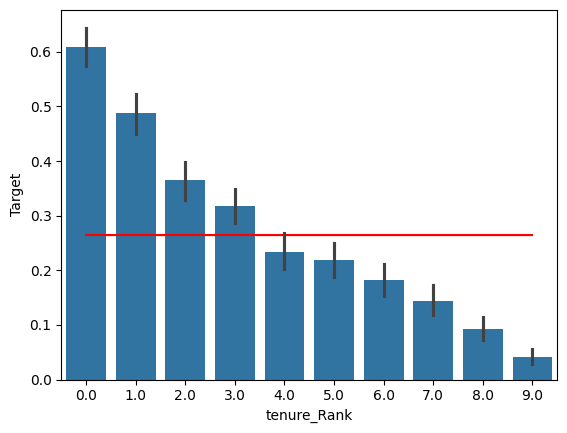

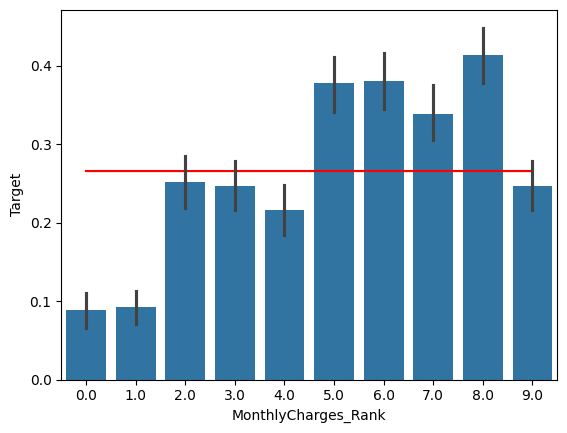

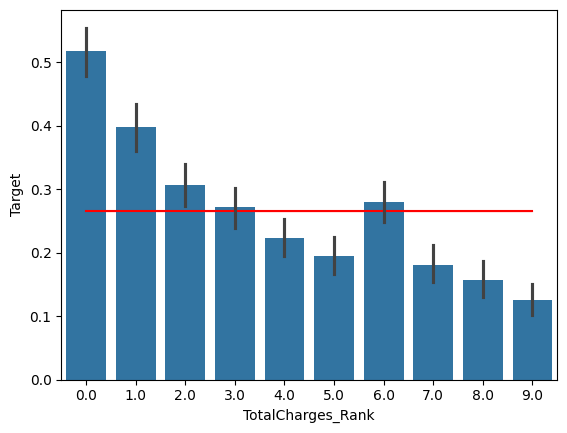

In [ ]:
X_bin_combined = pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
  plt.figure()
  sns.lineplot(x=col,y=X_bin_combined['Target'].mean(),data = X_bin_combined,color = 'red')
  sns.barplot(x=col, y = "Target",data=X_bin_combined, estimator = mean)
plt.show()


In [ ]:
select_feature_df_num = num_binned

In [ ]:
## Feature Selection - Categorical Features ##
char.dtypes


gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

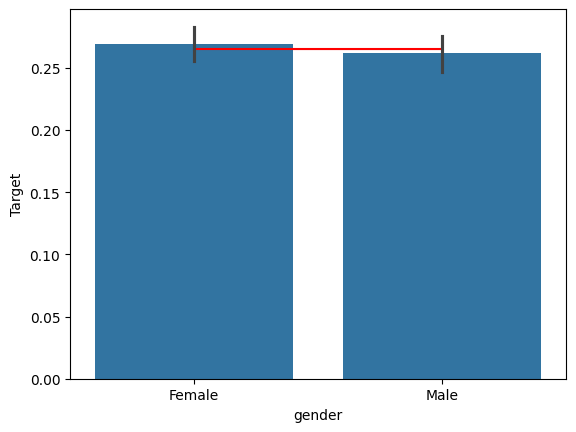

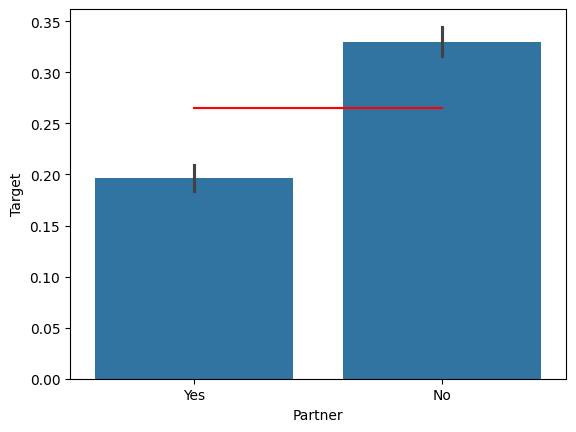

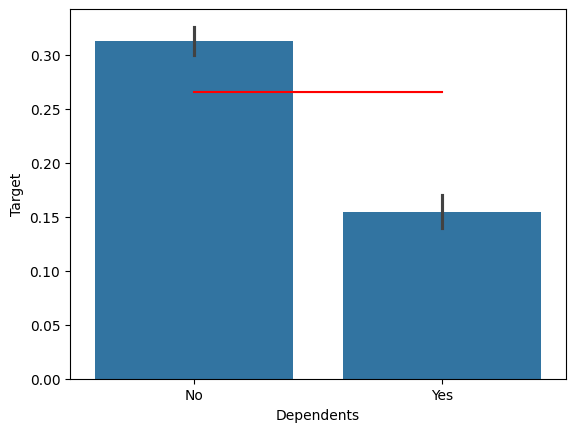

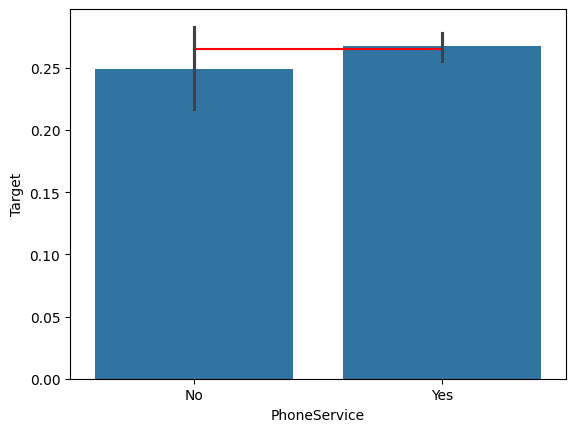

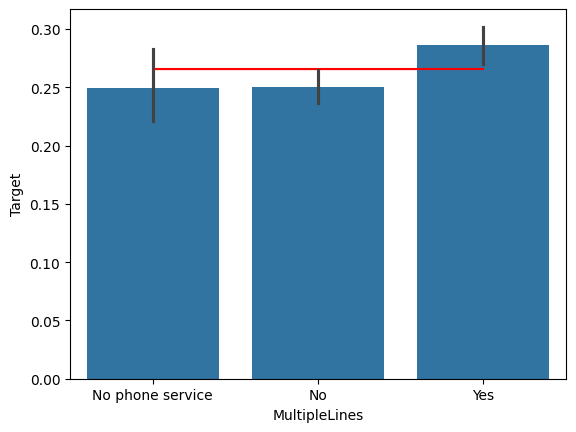

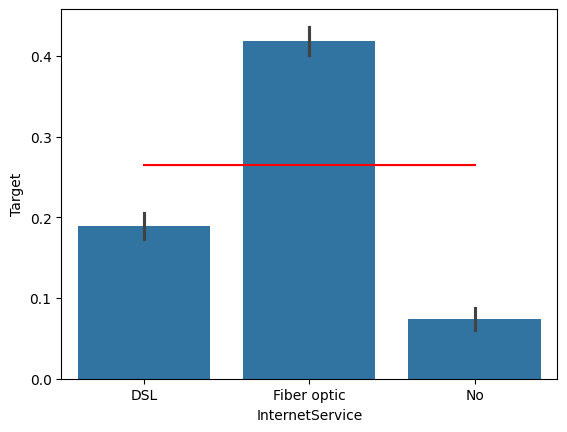

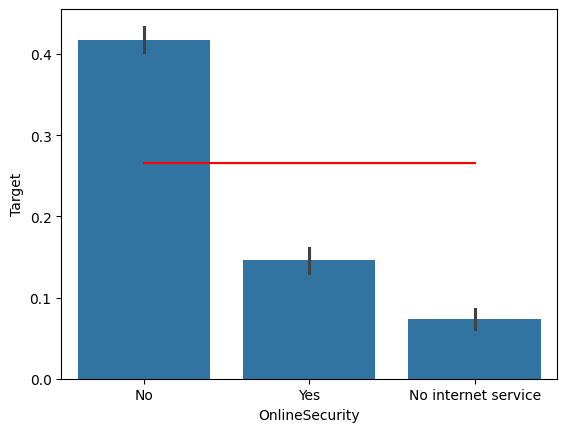

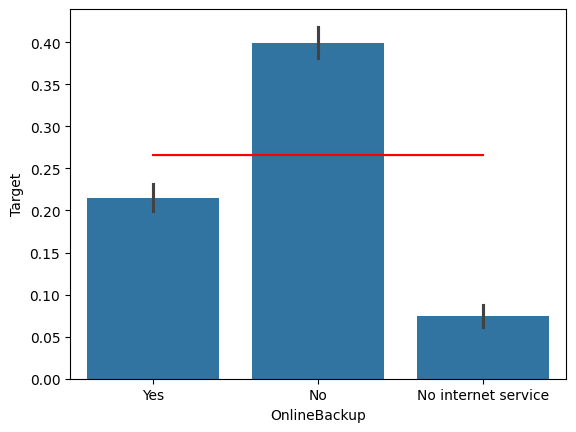

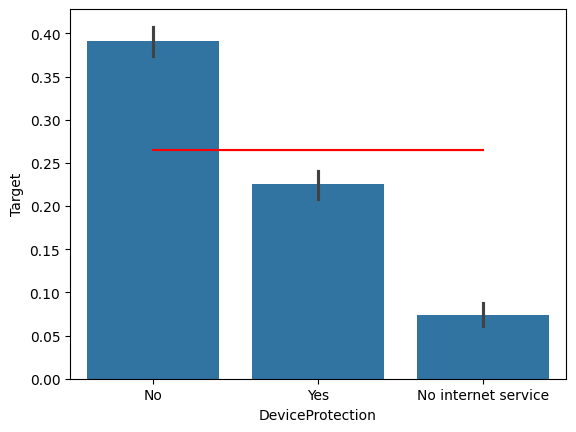

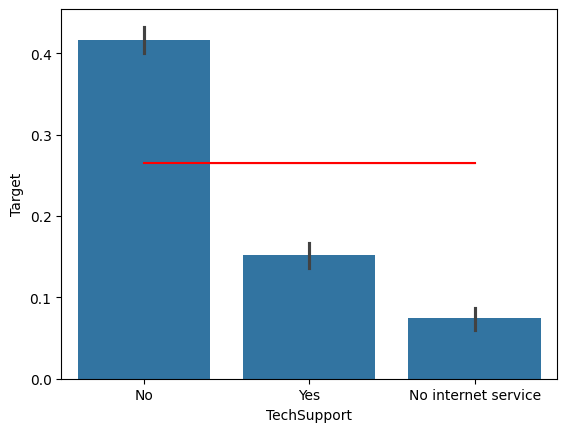

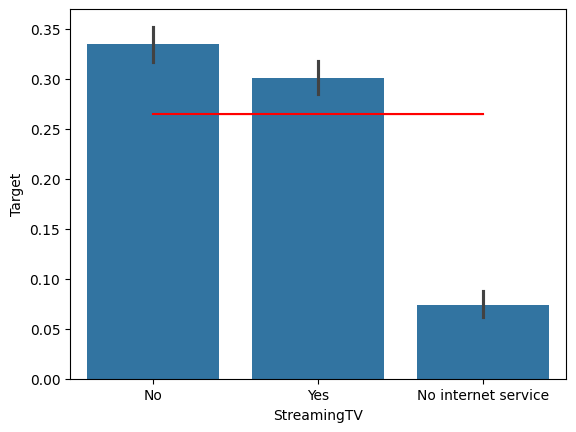

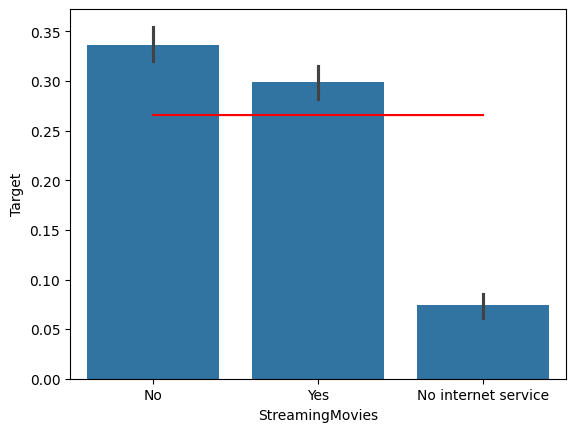

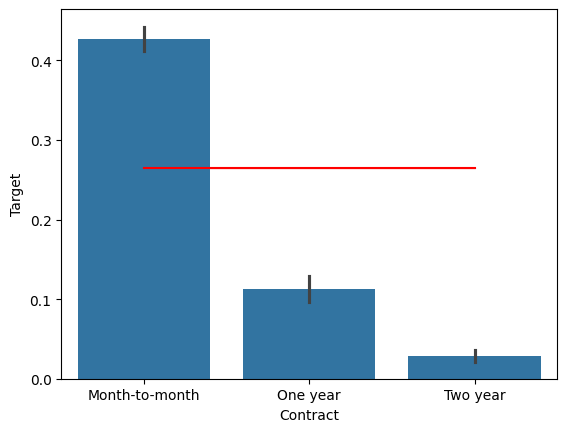

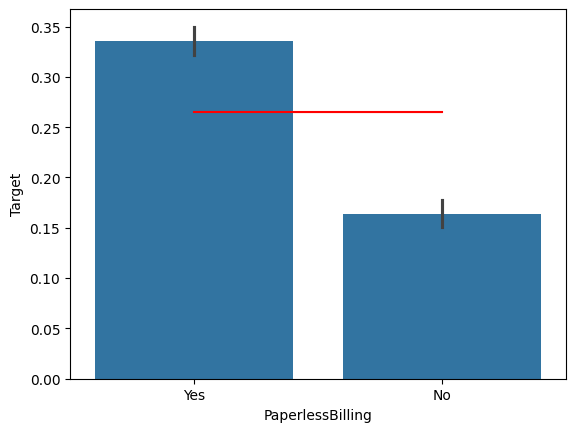

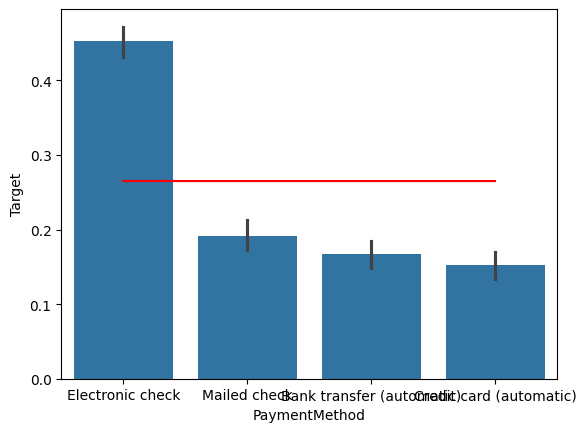

In [ ]:
## Part 1 - Bi Variate Analisys ##

X_char_merged = pd.concat([Y,char],axis=1,join = 'inner')

for col in char.columns:
  plt.figure()
  sns.lineplot(x=col,y=X_char_merged['Target'].mean(),data = X_char_merged, color = 'red')
  sns.barplot(x=col,y="Target",data=X_char_merged, estimator = mean)
plt.show()

In [ ]:
char.drop(['gender','PhoneService','MultipleLines'],axis=1,inplace = True)

In [ ]:
## Create dummy features with n-1 levels

X_char_dum = pd.get_dummies(char,drop_first = True)
X_char_dum = X_char_dum.astype(int)
X_char_dum.shape

(7043, 22)

In [ ]:
X_char_dum

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,1,1,1,0,0,0,0,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
'''## Part 2 - Select K Best ##
We can try PCA as well
from sklearn.feature_selection import SelectKBest , chi2
selector = SelectKBest(chi2,k=20)
selector.fit_transform(X_char_dum,Y)
cols = selector.get_support(indices=True)
select_feature_df_char = X_char_dum.iloc[:,cols]  ''' ## skipping this step as the columns number are small

'## Part 2 - Select K Best ##\nWe can try PCA as well\nfrom sklearn.feature_selection import SelectKBest , chi2\nselector = SelectKBest(chi2,k=20)\nselector.fit_transform(X_char_dum,Y)\ncols = selector.get_support(indices=True)\nselect_feature_df_char = X_char_dum.iloc[:,cols]  '

In [ ]:
select_feature_df_char = X_char_dum

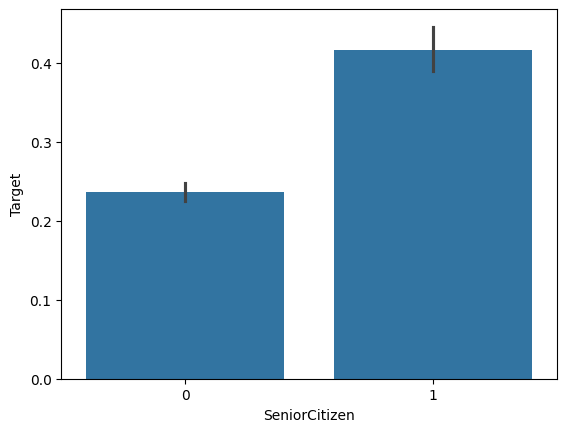

In [ ]:
## Feature Analysis of Indicator feature ##

X_ind_merged = pd.concat([Y,ind],axis=1,join = 'inner')
plt.figure()
sns.barplot(x='SeniorCitizen',y='Target',data=X_ind_merged,estimator = mean)
plt.show()

In [ ]:
select_feature_df_ind = ind

In [ ]:
## Creating the Master Feature Set for Model Development ##

X_all = pd.concat([select_feature_df_char,select_feature_df_num,select_feature_df_ind ],axis = 1 , join = 'inner')

In [ ]:
X_all

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank,SeniorCitizen
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.0,2.0,0.0,0
1,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,5.0,3.0,5.0,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,1.0,3.0,1.0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,6.0,2.0,5.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1.0,5.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,...,1,0,1,0,0,1,4.0,6.0,5.0,0
7039,1,1,1,0,0,0,0,1,0,1,...,1,0,1,1,0,0,9.0,9.0,9.0,0
7040,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,2.0,2.0,2.0,0
7041,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1.0,5.0,2.0,1


In [ ]:
## Train Test Split ##

from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X_all, Y , test_size = 0.3 , random_state = 90)

In [ ]:
print('shape of feature training set is ',X_train.shape)
print('shape of feature testing set is ',X_test.shape)
print('Mean of target train set is ',Y_train.mean())
print('Mean of target test set is ',Y_test.mean())
## churn rate for both train and test is maintained

shape of feature training set is  (4930, 26)
shape of feature testing set is  (2113, 26)
Mean of target train set is  0.2665314401622718
Mean of target test set is  0.2626597255087553


In [ ]:
## Model Training ##

In [ ]:
## Logistic Regression ##

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 99)
logreg.fit(X_train,Y_train)

LogisticRegression(random_state=99)

In [ ]:
coeff_df = pd.DataFrame(X_all.columns)
coeff_df.columns = ["features"]
coeff_df["Coefficient Estimates"] = pd.Series(logreg.coef_[0])

In [ ]:
coeff_df

,features,Coefficient Estimates
0,Partner_Yes,0.052335
1,Dependents_Yes,-0.220076
2,InternetService_Fiber optic,0.934997
3,InternetService_No,-0.130778
4,OnlineSecurity_No internet service,-0.130778
5,OnlineSecurity_Yes,-0.319059
6,OnlineBackup_No internet service,-0.130778
7,OnlineBackup_Yes,-0.013672
8,DeviceProtection_No internet service,-0.130778
9,DeviceProtection_Yes,0.015384


In [ ]:
## Decision Tree##

# using gini here , entropy should be used with complex data set

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth':[3,5,6,7] ,'min_samples_split':[50,100,150,200,250]}
tree_grid = GridSearchCV(dtree, cv = 10, param_grid = param_dist, n_jobs = 3)
tree_grid.fit(X_train,Y_train)
print('Best Parameter using gridsearchCV : \n',tree_grid.best_params_)

Best Parameter using gridsearchCV : 
 {'max_depth': 3, 'min_samples_split': 50}


In [ ]:
dtree = DecisionTreeClassifier(criterion = 'gini',random_state = 99,max_depth = 5,min_samples_split=5)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=99)

In [ ]:
## installing pydotplus for visualizing the decision tree

!pip install pydotplus

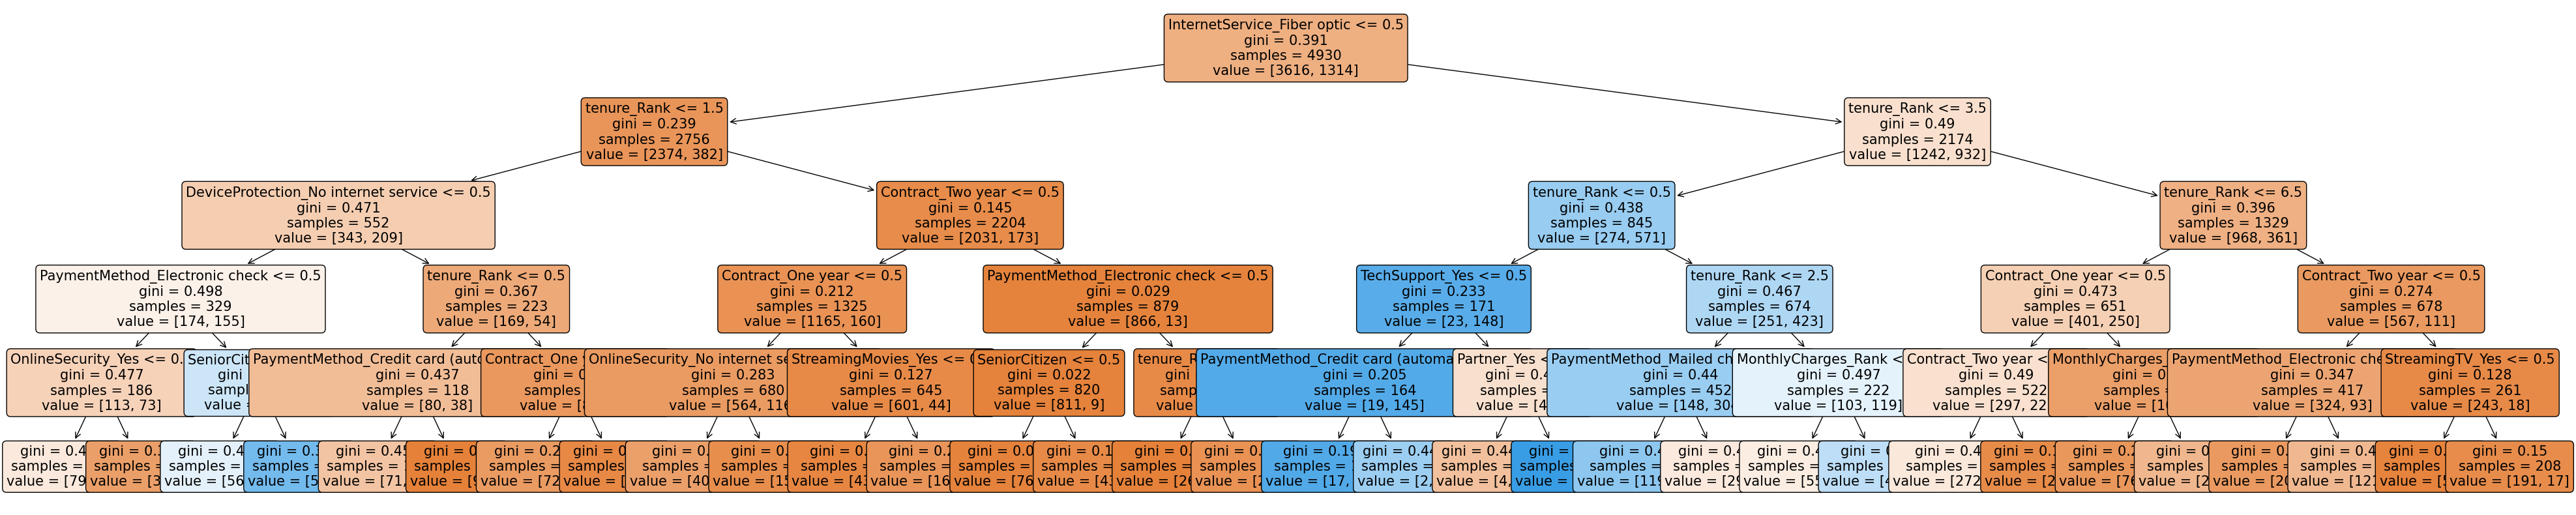

In [ ]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize = 15,rounded= True,feature_names=X_all.columns)
plt.show()

In [ ]:
## RANDOM FOREST MODEL (BAGGING ENSEMBLE TECHNIQUE) ##
## keeping the parameters same as the decision tree so that it can be comparable with decision tree

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',random_state=99,max_depth=5,min_samples_split=50)
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, min_samples_split=50, random_state=99)

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importances']).sort_values('importances',ascending=False)

In [ ]:
feature_importances

,importances
tenure_Rank,0.220801
InternetService_Fiber optic,0.136365
TotalCharges_Rank,0.111467
PaymentMethod_Electronic check,0.106660
Contract_Two year,0.088415
MonthlyCharges_Rank,0.048539
Contract_One year,0.043434
OnlineSecurity_Yes,0.037301
TechSupport_Yes,0.027168
StreamingTV_No internet service,0.026272


In [ ]:
## Gradiant Boosting Model ## (Boosting)

from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='squared_error',random_state=99,max_depth=6,min_samples_split=5)
gbm.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=6,
                           min_samples_split=5, random_state=99)

In [ ]:
feature_importances = pd.DataFrame(gbm.feature_importances_,index = X_train.columns,columns=['importances']).sort_values('importances',ascending=False)

In [ ]:
feature_importances

,importances
tenure_Rank,0.309001
InternetService_Fiber optic,0.190398
MonthlyCharges_Rank,0.066052
TotalCharges_Rank,0.057641
PaymentMethod_Electronic check,0.052962
Contract_One year,0.038889
Contract_Two year,0.038040
OnlineSecurity_Yes,0.025612
PaperlessBilling_Yes,0.024270
TechSupport_Yes,0.023450


In [ ]:
## Model Evaluation ##

y_pred_logreg = logreg.predict(X_test)
y_pred_tree = dtree.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbm = gbm.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [ ]:
## Evaluation Logistic Regression Model ##

print("Accuracy:",metrics.accuracy_score(Y_test,y_pred_logreg))
print("Precision:",metrics.precision_score(Y_test,y_pred_logreg))
print("Recall:",metrics.recall_score(Y_test,y_pred_logreg))
print("f1_score:",metrics.f1_score(Y_test,y_pred_logreg))

Accuracy: 0.7983909133932797
Precision: 0.648960739030023
Recall: 0.5063063063063064
f1_score: 0.5688259109311741


In [ ]:
## for the portion that is predicted FN there can be done root cause analysis to check why those were not detected by the model in realtime scenarios

In [ ]:
## Metrics evaluation for Decision Tree
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_tree))
print("Precision",metrics.precision_score(Y_test,y_pred_tree))
print("Recall",metrics.recall_score(Y_test,y_pred_tree))
print("f1_score",metrics.f1_score(Y_test,y_pred_tree))

Accuracy: 0.7827733080927591
Precision 0.6411764705882353
Recall 0.3927927927927928
f1_score 0.48715083798882686


In [ ]:
## Metrics evaluation for Random Forest
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_rf))
print("Precision",metrics.precision_score(Y_test,y_pred_rf))
print("Recall",metrics.recall_score(Y_test,y_pred_rf))
print("f1_score",metrics.f1_score(Y_test,y_pred_rf))

Accuracy: 0.7898722195929957
Precision 0.6637168141592921
Recall 0.40540540540540543
f1_score 0.5033557046979866


In [ ]:
## Metrics evaluation for GBM

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_gbm))
print("Precision",metrics.precision_score(Y_test,y_pred_gbm))
print("Recall",metrics.recall_score(Y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(Y_test,y_pred_gbm))


Accuracy: 0.7960246095598675
Precision 0.6313559322033898
Recall 0.5369369369369369
f1_score 0.5803310613437196


In [ ]:
results = pd.DataFrame()
results['model name'] = ['log_reg','decision_tree','random_forest','gbm']
results['accuracy']=[metrics.accuracy_score(Y_test, y_pred_logreg),metrics.accuracy_score(Y_test, y_pred_tree),metrics.accuracy_score(Y_test, y_pred_rf),metrics.accuracy_score(Y_test, y_pred_gbm)]
results['precision']=[metrics.precision_score(Y_test, y_pred_logreg),metrics.precision_score(Y_test, y_pred_tree),metrics.precision_score(Y_test, y_pred_rf),metrics.precision_score(Y_test, y_pred_gbm)]
results['recall']=[metrics.recall_score(Y_test, y_pred_logreg),metrics.recall_score(Y_test, y_pred_tree),metrics.recall_score(Y_test, y_pred_rf),metrics.recall_score(Y_test, y_pred_gbm)]
results['F1_score']=[metrics.f1_score(Y_test, y_pred_logreg),metrics.f1_score(Y_test, y_pred_tree),metrics.f1_score(Y_test, y_pred_rf),metrics.f1_score(Y_test, y_pred_gbm)]
results

,model name,accuracy,precision,recall,F1_score
0,log_reg,0.798391,0.648961,0.506306,0.568826
1,decision_tree,0.782773,0.641176,0.392793,0.487151
2,random_forest,0.789872,0.663717,0.405405,0.503356
3,gbm,0.796025,0.631356,0.536937,0.580331


In [ ]:
feature_importance = logreg.coef_[0]

# Create a list of tuples with feature names and their importance
feature_importance_tuples = list(zip(X_train.columns, feature_importance))

# Sort the feature importance tuples in descending order
sorted_feature_importance = sorted(feature_importance_tuples, key=lambda x: abs(x[1]), reverse=True)
sorted_feature_importance

feature_imp = pd.DataFrame(sorted_feature_importance, columns = ['feature_name','importance_score'])
feature_imp

,feature_name,importance_score
0,Contract_Two year,-1.417587
1,InternetService_Fiber optic,0.934997
2,Contract_One year,-0.643961
3,PaperlessBilling_Yes,0.367917
4,PaymentMethod_Electronic check,0.365296
5,OnlineSecurity_Yes,-0.319059
6,TechSupport_Yes,-0.311864
7,StreamingMovies_Yes,0.306814
8,StreamingTV_Yes,0.290220
9,SeniorCitizen,0.269738


In [ ]:
# Hyperparameters Finetuning

**Hyperparameters used:**


*   penalty: L1 , L2 and elasticnet. By default penalty is L2.

*  C: regularization parameter. This depicts the complexity of model



*  solver: Optimization problems can be solved by different solvers
*  max_iters: in how many steps the global minima is reached







In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
param_grid = [
    {'penalty' : ['l1'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    'max_iter' : [500, 1000, 1500]
    }
]

In [ ]:
import warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
gsc = GridSearchCV(logreg, param_grid = param_grid, cv = 10,verbose=True, n_jobs=-1,error_score='raise')
tuned_model = gsc.fit(X_train,Y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


In [ ]:
tuned_model.best_estimator_

LogisticRegression(C=0.23357214690901212, max_iter=500, penalty='l1',
                   random_state=99, solver='liblinear')

In [ ]:
lr_finetuned = logreg.set_params(C=0.23357214690901212, max_iter=500, penalty='l1',
                   random_state=99, solver='liblinear')

In [ ]:
model_L1 = lr_finetuned.fit(X_train,Y_train)
y_pred_L1 = model_L1.predict(X_test)




In [ ]:
## Metrics Accuracy for L1 Logistic Regression ##

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_L1))
print("Precision",metrics.precision_score(Y_test,y_pred_L1))
print("Recall",metrics.recall_score(Y_test,y_pred_L1))
print("f1_score",metrics.f1_score(Y_test,y_pred_L1))

Accuracy: 0.79649787032655
Precision 0.6520681265206812
Recall 0.4828828828828829
f1_score 0.5548654244306418


In [ ]:
param_grid = [
    {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg'],
    'max_iter' : [500, 1000, 1500]
    }
]

In [ ]:
gsc = GridSearchCV(logreg, param_grid = param_grid, cv = 10,verbose=True, n_jobs=-1,error_score='raise')
tuned_model = gsc.fit(X_train,Y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


In [ ]:
tuned_model.best_estimator_

LogisticRegression(C=0.08858667904100823, max_iter=500, random_state=99)

In [ ]:
lr_finetuned = logreg.set_params(C=0.08858667904100823, max_iter=500, random_state=99)

In [ ]:
model_L2 = lr_finetuned.fit(X_train,Y_train)
y_pred_L2 = model_L2.predict(X_test)




In [ ]:
## Metrics Accuracy for L2 Logistic Regression ##

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_L2))
print("Precision",metrics.precision_score(Y_test,y_pred_L2))
print("Recall",metrics.recall_score(Y_test,y_pred_L2))
print("f1_score",metrics.f1_score(Y_test,y_pred_L2))

Accuracy: 0.79649787032655
Precision 0.6520681265206812
Recall 0.4828828828828829
f1_score 0.5548654244306418


In [ ]:
param_grid = [
    {'penalty' : ['elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['saga'],
    'max_iter' : [500, 1000, 1500],
    'l1_ratio': [0.25, 0.5, 0.75]  # Adjust as per your requirements

    }
]

In [ ]:
gsc = GridSearchCV(logreg, param_grid = param_grid, cv = 10,verbose=True, n_jobs=-1,error_score='raise')
tuned_model = gsc.fit(X_train,Y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [ ]:
tuned_model.best_estimator_

LogisticRegression(C=0.03359818286283781, l1_ratio=0.25, max_iter=500,
                   penalty='elasticnet', random_state=99, solver='saga')

In [ ]:
lr_finetuned = logreg.set_params(C=0.03359818286283781, l1_ratio=0.25, max_iter=500,
                   penalty='elasticnet', random_state=99, solver='saga')

In [ ]:
model_elasticnet = lr_finetuned.fit(X_train,Y_train)
y_pred_elasticnet = model_L2.predict(X_test)




In [ ]:
## Metrics Accuracy for elasticnet Logistic Regression ##

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_elasticnet))
print("Precision",metrics.precision_score(Y_test,y_pred_elasticnet))
print("Recall",metrics.recall_score(Y_test,y_pred_elasticnet))
print("f1_score",metrics.f1_score(Y_test,y_pred_elasticnet))

Accuracy: 0.79649787032655
Precision 0.6520681265206812
Recall 0.4828828828828829
f1_score 0.5548654244306418


In [ ]:
results = pd.DataFrame()
results['model name'] = ['log_reg','L1_log_reg','L2_log_reg','Elasticnet_log_reg']
results['accuracy']=[metrics.accuracy_score(Y_test, y_pred_logreg),metrics.accuracy_score(Y_test, y_pred_L1),metrics.accuracy_score(Y_test, y_pred_L2),metrics.accuracy_score(Y_test, y_pred_elasticnet)]
results['precision']=[metrics.precision_score(Y_test, y_pred_logreg),metrics.precision_score(Y_test, y_pred_L1),metrics.precision_score(Y_test, y_pred_L2),metrics.precision_score(Y_test, y_pred_elasticnet)]
results['recall']=[metrics.recall_score(Y_test, y_pred_logreg),metrics.recall_score(Y_test, y_pred_L1),metrics.recall_score(Y_test, y_pred_L2),metrics.recall_score(Y_test, y_pred_elasticnet)]
results['F1_score']=[metrics.f1_score(Y_test, y_pred_logreg),metrics.f1_score(Y_test, y_pred_L1),metrics.f1_score(Y_test, y_pred_L2),metrics.f1_score(Y_test, y_pred_elasticnet)]
results

,model name,accuracy,precision,recall,F1_score
0,log_reg,0.798391,0.648961,0.506306,0.568826
1,L1_log_reg,0.796498,0.652068,0.482883,0.554865
2,L2_log_reg,0.796498,0.652068,0.482883,0.554865
3,Elasticnet_log_reg,0.796498,0.652068,0.482883,0.554865


**Conclusion**



*   Logisitc regression has scored the maximum with respect to other models ( decision tree , random forest and gradient boosting )
*   Logistic regression without any penality has performed better than with penality



